## Singular Value Decomposition (SVD)

Singular Value Decomposition (SVD) is a powerful mathematical technique that can be applied to real datasets to explore patterns, reduce dimensionality, and uncover insights. Here’s an overview of why SVD works, its advantages, and how we can visualize its effectiveness using plots.

SVD decomposes a matrix AA (of size m×nm×n) into three matrices:
$$
A = U \Sigma V^T
$$

Where:


- \( A \): The original matrix of size \( m \times n \) (e.g., users vs. items interaction matrix in recommender systems).
- \( U \): A matrix of size \( m \times r \) containing the left singular vectors (orthonormal basis for users).
- \( \Sigma \): A diagonal matrix of size \( r \times r \) containing singular values (importance weights).
- \( V^T \): A matrix of size \( r \times n \) containing the right singular vectors (orthonormal basis for items).

Here, \( r \) is the rank of the matrix \( A \), i.e., the number of non-zero singular values.
$

## 1. Introduction to SVD

Singular Value Decomposition (SVD) is a powerful technique used in data analysis, dimensionality reduction, and noise reduction. It decomposes a matrix into three components, which helps uncover patterns, reduce complexity, and denoise data.


## 2. Load Dataset and Perform SVD
Let's use the Iris dataset as an example.

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer

# Load the dataset
data = load_iris()
X = data.data

# Introduce some missing values for demonstration
np.random.seed(42)
missing_mask = np.random.rand(*X.shape) < 0.1
X_with_missing = X.copy()
X_with_missing[missing_mask] = np.nan

# Perform SVD
U, S, Vt = np.linalg.svd(X, full_matrices=False)

## 3. Handling Missing Values with SVD
Use SVD to predict missing values.

In [9]:
# Simple imputation to initialize missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_with_missing)

# Iterative SVD to refine missing value predictions
def svd_impute(X, max_iter=10, tol=1e-5):
    X_filled = X.copy()
    for _ in range(max_iter):
        try:
            U, S, Vt = np.linalg.svd(X_filled, full_matrices=False)
        except np.linalg.LinAlgError:
            print("SVD did not converge. Returning the last computed matrix.")
            return X_filled
        X_reconstructed = np.dot(U, np.dot(np.diag(S), Vt))
        prev_X_filled = X_filled.copy()
        X_filled[np.isnan(X)] = X_reconstructed[np.isnan(X)]
        if np.linalg.norm(X_filled - prev_X_filled, ord='fro') < tol:
            break
    return X_filled

X_predicted = svd_impute(X_with_missing)

SVD did not converge. Returning the last computed matrix.


## 4. Singular Value Spectrum
Visualize how singular values capture the importance of each dimension.

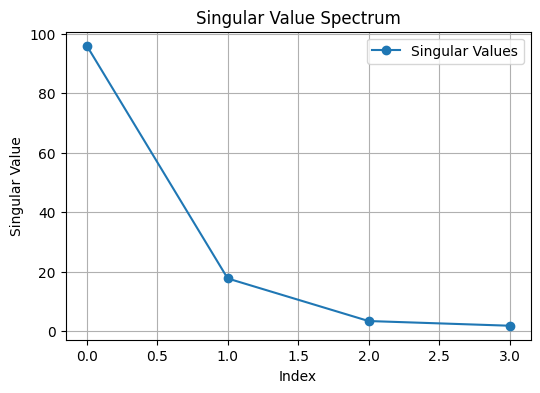

In [10]:
plt.figure(figsize=(6, 4))
plt.plot(S, 'o-', label="Singular Values")
plt.title("Singular Value Spectrum")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.legend()
plt.grid()
plt.show()

## 5. Reconstruction Error
Reconstruct the dataset using a subset of singular values and observe the trade-off between dimensionality and reconstruction error.

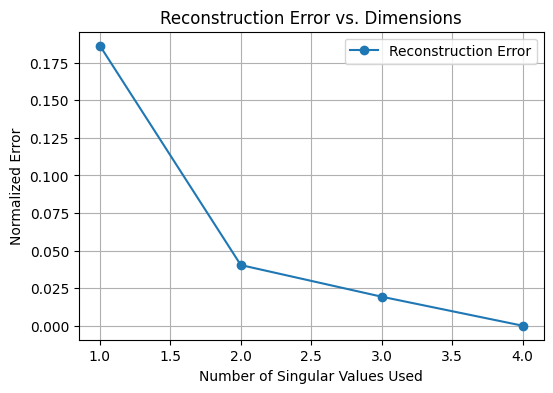

In [11]:
errors = []
for k in range(1, len(S) + 1):
    X_approx = (U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :])
    error = np.linalg.norm(X - X_approx, 'fro') / np.linalg.norm(X, 'fro')
    errors.append(error)

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(S) + 1), errors, 'o-', label="Reconstruction Error")
plt.title("Reconstruction Error vs. Dimensions")
plt.xlabel("Number of Singular Values Used")
plt.ylabel("Normalized Error")
plt.legend()
plt.grid()
plt.show()

## 6. Dimensionality Reduction (2D Projection)
Project the data into 2D space using SVD and visualize.

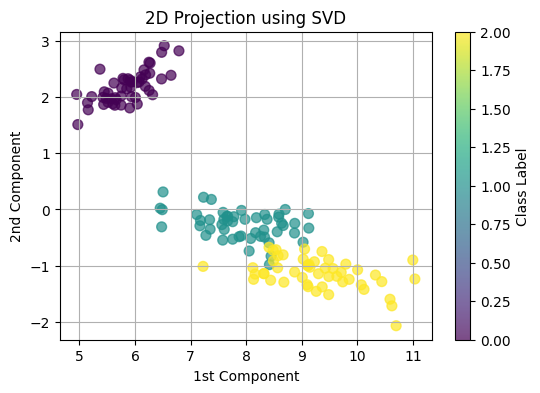

In [12]:
svd = TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(X)

plt.figure(figsize=(6, 4))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=data.target, cmap='viridis', s=50, alpha=0.7)
plt.title("2D Projection using SVD")
plt.xlabel("1st Component")
plt.ylabel("2nd Component")
plt.colorbar(label="Class Label")
plt.grid()
plt.show()

## 7. Comparison: With and Without SVD
Compare clustering with and without dimensionality reduction.

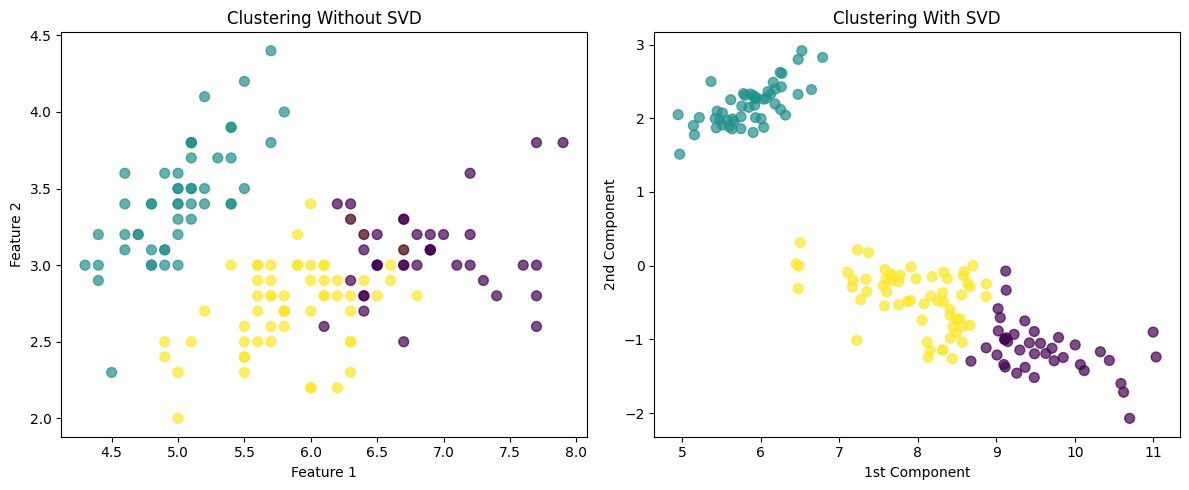

: 

In [ ]:
from sklearn.cluster import KMeans

# Clustering without SVD
kmeans_no_svd = KMeans(n_clusters=3, random_state=42)
labels_no_svd = kmeans_no_svd.fit_predict(X)

# Clustering with SVD (2D)
kmeans_svd = KMeans(n_clusters=3, random_state=42)
labels_svd = kmeans_svd.fit_predict(X_2d)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Without SVD
ax[0].scatter(X[:, 0], X[:, 1], c=labels_no_svd, cmap='viridis', s=50, alpha=0.7)
ax[0].set_title("Clustering Without SVD")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

# With SVD
ax[1].scatter(X_2d[:, 0], X_2d[:, 1], c=labels_svd, cmap='viridis', s=50, alpha=0.7)
ax[1].set_title("Clustering With SVD")
ax[1].set_xlabel("1st Component")
ax[1].set_ylabel("2nd Component")

plt.tight_layout()
plt.show()

## 8. Advantages of SVD
1. **Dimensionality Reduction**: Reduces high-dimensional data to fewer dimensions without losing much information, useful in applications like image compression and latent semantic analysis.
2. **Noise Reduction**: By discarding small singular values, we eliminate noise in the data.
3. **Data Insights**: Provides a geometric view of data, helping identify clusters or directions of variance.
4. **Improved Clustering**: By reducing to meaningful components, SVD enhances clustering results.
5. **Better Visualization**: Enables visualization of high-dimensional data in 2D or 3D.

---

## 9. Disadvantages of SVD
1. **Computational Cost**: For large datasets, SVD can be computationally expensive due to matrix factorization.
2. **Interpretability**: The components (singular vectors) may not always have a clear physical interpretation.
3. **Sensitivity to Noise**: While SVD can reduce noise, it can also be sensitive to small perturbations in the data.
4. **Data Dependency**: SVD works well on structured data but might not be effective on very sparse or unstructured datasets.